In [7]:
import sys
import pandas as pd
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy.feature as cfeature

sys.path.append(str(Path(Path.cwd()).parent.resolve()))

from src.utils import draw_path_on_world_map

# Loading the Graph

In [8]:
DATA_PROC = Path("../data/processed/worldcities_processed_major.csv")
df = pd.read_csv(DATA_PROC)

GRAPH_PATH = Path("../artifacts/cities_graph_major.pkl")
with open(GRAPH_PATH, "rb") as f:
    G: nx.DiGraph = pickle.load(f)

# Finding the shortest path

In [9]:
london_rows = df[df['city']=='london'].sort_values('population', ascending=False)
if london_rows.empty:
    raise ValueError("No London found.")
london_row = london_rows.iloc[0]
start_idx = london_row.name
start_lon = london_row['lon']

In [10]:
# Create a node that copies London to avoid getting zero distance
G.add_node(-1, **london_row.to_dict())
# Mimic edges going into London
# Find all nodes that have edges to London
for node in G.nodes:
    if G.has_edge(node, start_idx):
        e = G.get_edge_data(node, start_idx)
        G.add_edge(node, -1, **e)

In [11]:
length, path = nx.single_source_dijkstra(G, start_idx, target=-1, weight='weight')
total_travel_time = length
print(f"Total travel time from London back to London: {total_travel_time:.2f} hours")

Total travel time from London back to London: 728.00 hours


In [12]:
threshold_hours = 80 * 24
if total_travel_time <= threshold_hours:
    path.pop(-1)
    print(f"Success! The traveler can circumnavigate the globe and return to London within 80 days.")
    print("Path taken:", [df.loc[node, "city"] for node in path])
else:
    print(f"Failure. The traveler cannot return to London within 80 days.")

Success! The traveler can circumnavigate the globe and return to London within 80 days.
Path taken: ['london', 'grays', 'basildon', 'wickford', 'witham', 'colchester', 'ipswich', 'lowestoft', 'blankenberge', 'knokke-heist', 'oostburg', 'vlissingen', 'borsele', 'goes', 'kapelle', 'middelharnis', 'spijkenisse', 'oud-beijerland', 'barendrecht', 'ridderkerk', 'alblasserdam', 'papendrecht', 'werkendam', 'gorinchem', 'leerdam', 'culemborg', 'doorn', 'woudenberg', 'barneveld', 'putten', 'nunspeet', 'oldebroek', 'hattem', 'dalfsen', 'ommen', 'hardenberg', 'coevorden', 'emmen', 'haren', 'meppen', 'haselunne', 'loningen', 'cloppenburg', 'vechta', 'diepholz', 'twistringen', 'bassum', 'syke', 'achim', 'ottersberg', 'rotenburg', 'schneverdingen', 'seevetal', 'stelle', 'reinbek', 'schwarzenbek', 'molln', 'ratzeburg', 'timmendorfer strand', 'heiligenhafen', 'maribo', 'vordingborg', 'koge', 'ishoj', 'vaerlose', 'stavnsholt', 'trorod', 'landskrona', 'eslov', 'kristianstad', 'ronneby', 'nybro', 'oskarsh

# Drawing the path on a world map

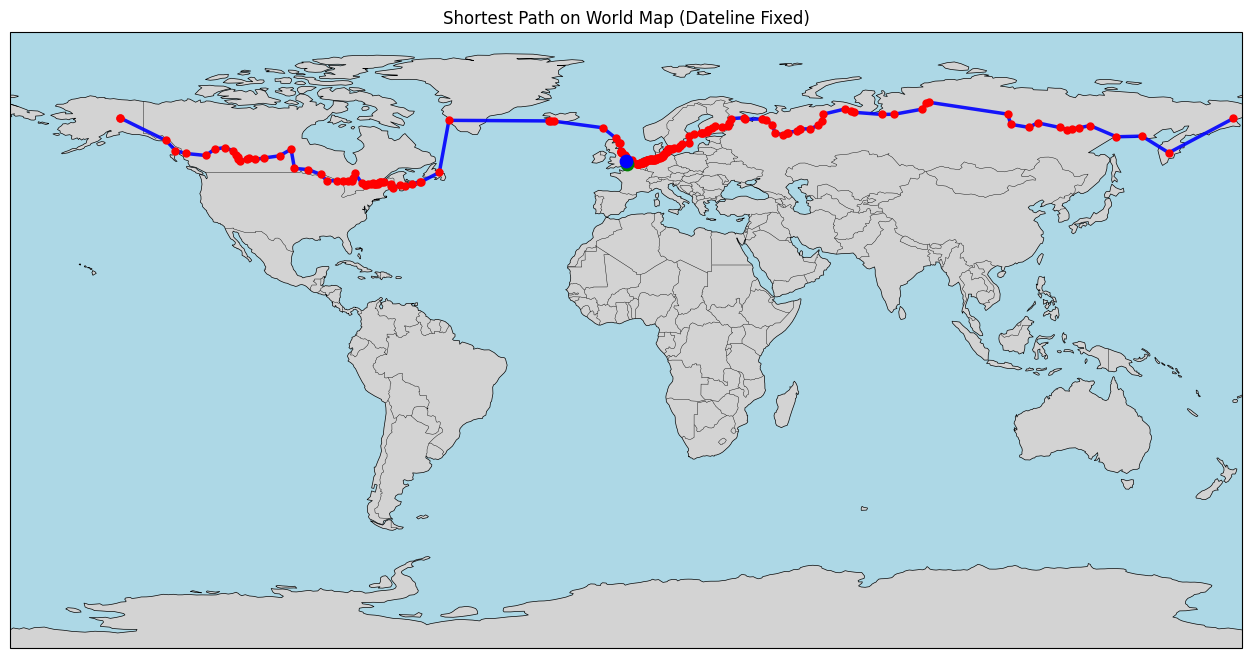

In [13]:
path_clean = path.pop(-1)  # Remove the London copy node
draw_path_on_world_map(df, path)